# Explore here

diabetes_prevalence                                             1.000000
diabetes_Upper 95% CI                                           0.998409
diabetes_Lower 95% CI                                           0.998069
CKD_Lower 95% CI                                                0.924630
CKD_prevalence                                                  0.918514
                                                                  ...   
Percent of adults with a bachelor's degree or higher 2014-18   -0.669985
CI90UBINC_2018                                                 -0.720364
CI90LBINC_2018                                                 -0.720820
Median_Household_Income_2018                                   -0.723316
MEDHHINC_2018                                                  -0.723316
Name: diabetes_prevalence, Length: 106, dtype: float64
   Obesity_prevalence  COPD_prevalence  Heart disease_prevalence  \
0                35.8              8.6                       7.9   
1     

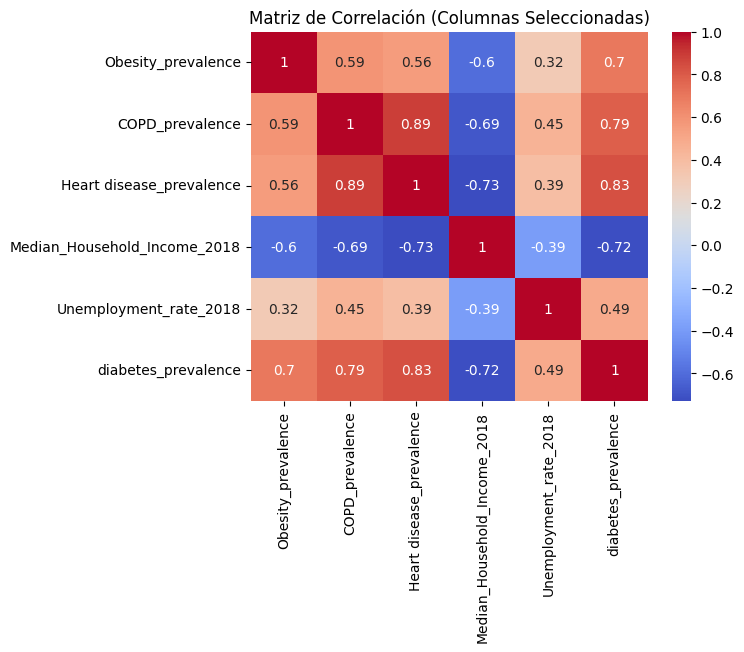

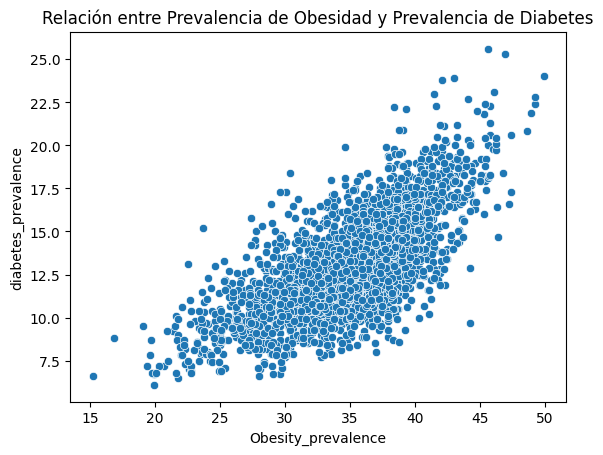

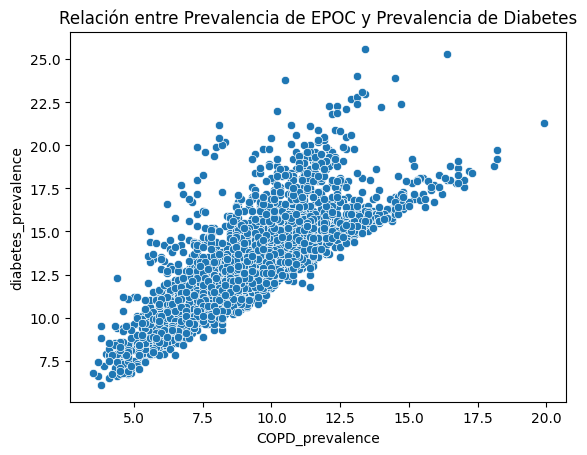

R2 del modelo de Regresión Lineal: 0.7994171157820685
Error Cuadrático Medio del modelo de Regresión Lineal: 1.613318617021297
R2 del modelo Lasso: 0.7962057681144058
Error Cuadrático Medio del modelo Lasso: 1.6391479742875894


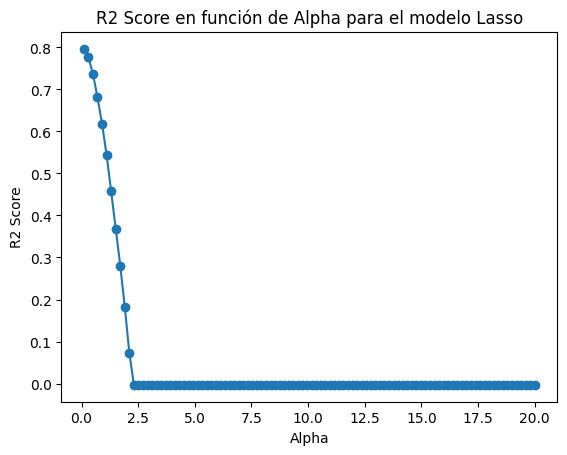

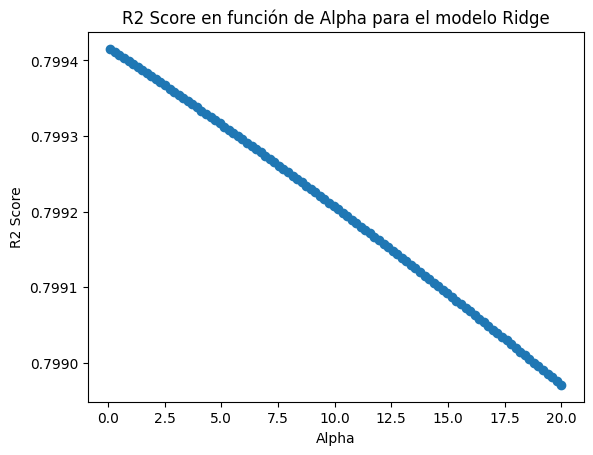

R2 del modelo Ridge optimizado: 0.7994151494096777
Error Cuadrático Medio del modelo Ridge optimizado: 1.6133344328532337


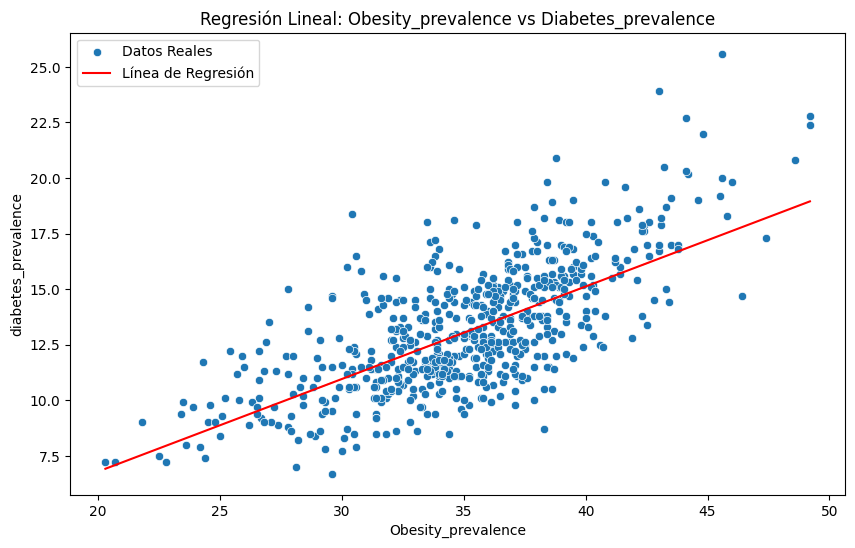

R2 del modelo de Regresión Lineal: 0.7994171157820685
Error Cuadrático Medio del modelo de Regresión Lineal: 1.613318617021297
R2 del modelo Lasso optimizado: 0.7962057681144058
Error Cuadrático Medio del modelo Lasso optimizado: 1.6391479742875894
R2 del modelo Ridge optimizado: 0.7994151494096777
Error Cuadrático Medio del modelo Ridge optimizado: 1.6133344328532337


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Ajustar las opciones de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Paso 1: Carga del Conjunto de Datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url)

# Eliminar columnas no numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación solo con columnas numéricas
corr_matrix = numeric_data.corr()

# Mostrar la matriz de correlación de 'diabetes_prevalence' con otras variables
print(corr_matrix['diabetes_prevalence'].sort_values(ascending=False))

# Selección de columnas relevantes basadas en la correlación
selected_columns = [
    'Obesity_prevalence', 'COPD_prevalence', 'Heart disease_prevalence',
    'Median_Household_Income_2018', 'Unemployment_rate_2018', 'diabetes_prevalence'
]

# Eliminar filas con valores nulos en las columnas seleccionadas
data = numeric_data[selected_columns].dropna()

# Mostrar las primeras filas del dataset para verificar
print(data.head())

# Paso 2: Análisis Exploratorio de Datos (EDA)
# Matriz de correlación con columnas seleccionadas
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (Columnas Seleccionadas)')
plt.show()

# Gráfico de la relación entre 'Obesity_prevalence' y 'diabetes_prevalence'
sns.scatterplot(data=data, x='Obesity_prevalence', y='diabetes_prevalence')
plt.title('Relación entre Prevalencia de Obesidad y Prevalencia de Diabetes')
plt.show()

# Gráfico de la relación entre 'COPD_prevalence' y 'diabetes_prevalence'
sns.scatterplot(data=data, x='COPD_prevalence', y='diabetes_prevalence')
plt.title('Relación entre Prevalencia de EPOC y Prevalencia de Diabetes')
plt.show()

# Paso 3: Construcción del Modelo de Regresión
# Selección de características numéricas y variable objetivo
X = data.drop(columns=['diabetes_prevalence'])
y = data['diabetes_prevalence']

# Dividir el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Regresión Lineal Base
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluación del modelo de Regresión Lineal
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f"R2 del modelo de Regresión Lineal: {r2_linear}")
print(f"Error Cuadrático Medio del modelo de Regresión Lineal: {mse_linear}")

# Modelo Lasso
lasso_model = Lasso(alpha=0.1, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluación del modelo Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"R2 del modelo Lasso: {r2_lasso}")
print(f"Error Cuadrático Medio del modelo Lasso: {mse_lasso}")

# Paso 4: Optimización del Modelo Lasso
# Prueba de diferentes valores de alpha para el modelo Lasso
alphas = np.linspace(0.1, 20, 100)
r2_scores_lasso = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred = lasso_model.predict(X_test_scaled)
    r2_scores_lasso.append(r2_score(y_test, y_pred))

# Graficar el R2 en función de alpha para el modelo Lasso
plt.plot(alphas, r2_scores_lasso, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score en función de Alpha para el modelo Lasso')
plt.show()

# Paso 4: Optimización del Modelo Ridge
# Prueba de diferentes valores de alpha para el modelo Ridge
alphas = np.linspace(0.1, 20, 100)
r2_scores_ridge = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, max_iter=10000)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred = ridge_model.predict(X_test_scaled)
    r2_scores_ridge.append(r2_score(y_test, y_pred))

# Graficar el R2 en función de alpha para el modelo Ridge
plt.plot(alphas, r2_scores_ridge, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score en función de Alpha para el modelo Ridge')
plt.show()

# Evaluación del modelo Ridge optimizado
optimal_alpha_ridge = 0.1
ridge_model_optimal = Ridge(alpha=optimal_alpha_ridge, max_iter=10000)
ridge_model_optimal.fit(X_train_scaled, y_train)
y_pred_ridge_optimal = ridge_model_optimal.predict(X_test_scaled)

r2_ridge_optimal = r2_score(y_test, y_pred_ridge_optimal)
mse_ridge_optimal = mean_squared_error(y_test, y_pred_ridge_optimal)

print(f"R2 del modelo Ridge optimizado: {r2_ridge_optimal}")
print(f"Error Cuadrático Medio del modelo Ridge optimizado: {mse_ridge_optimal}")

# Paso 5: Gráfico de regresión lineal para 'Obesity_prevalence'
# Selección de características y variable objetivo para un modelo simple
X_simple = data[['Obesity_prevalence']]
y_simple = data['diabetes_prevalence']

# Dividir el conjunto de datos en train y test
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
linear_model_simple = LinearRegression()
linear_model_simple.fit(X_train_simple, y_train_simple)

# Predicciones
y_pred_simple = linear_model_simple.predict(X_test_simple)

# Gráfico de regresión lineal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_simple['Obesity_prevalence'], y=y_test_simple, label='Datos Reales')
sns.lineplot(x=X_test_simple['Obesity_prevalence'], y=y_pred_simple, color='red', label='Línea de Regresión')
plt.xlabel('Obesity_prevalence')
plt.ylabel('diabetes_prevalence')
plt.title('Regresión Lineal: Obesity_prevalence vs Diabetes_prevalence')
plt.legend()
plt.show()

# Resumen de Resultados
print(f"R2 del modelo de Regresión Lineal: {r2_linear}")
print(f"Error Cuadrático Medio del modelo de Regresión Lineal: {mse_linear}")
print(f"R2 del modelo Lasso optimizado: {r2_lasso}")
print(f"Error Cuadrático Medio del modelo Lasso optimizado: {mse_lasso}")
print(f"R2 del modelo Ridge optimizado: {r2_ridge_optimal}")
print(f"Error Cuadrático Medio del modelo Ridge optimizado: {mse_ridge_optimal}")